Business Data Analytics Project

18MCMI05: Delton M Antony, MTech Artificial Intelligence

18MCMI14: Garima Jain, MTech Artificial Intelligence

Churn Prediction Dataset

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features).
The “Churn” column is our target

Classification:

Classification is a supervised learning approach in which the computer program learns from the data input given to it and then uses this learning to classify new observation. Here, in the telecom churn prediction dataset, the problem is to predict whether the customer is going to churn or not.

Loading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read into a pandas dataframe
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

View the first few records

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


check for the datatype of the features and information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Data Preprocessing:
We need to correct the datatype of features, check and impute for null values, perform data partitioning, handle categorical data, perform feature selection and feature scaling

Note that the total charges in a non-null object. We need to convert it into a numerical datatype.

In [4]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

Now let us check for null values.

In [5]:
nulls = data.isnull().sum()
nulls[nulls > 0]

TotalCharges    11
dtype: int64

There are eleven null values in 'TotalCharges'. Let us impute these null values with zeroes

In [6]:
data.fillna(0,inplace=True)

The 'no phone service' value in the above MultipleLines independent variable can be treated as 'No'

In [7]:
data['MultipleLines'].replace('No phone service','No',inplace=True)

Let y be the vector of dependent variable values of "Churn" and Let X be the matrix heading all the independent variables. Split the data into train and target data

In [8]:
y = data['Churn'].map({'Yes':1,'No':0})
X = data.drop(labels=['Churn','customerID'],axis=1).copy()

Tenure, MonthlyCharges and TotalCharges are not categorical. Every other column is categorical. Hence, we need to convert the categorical columns into binary. First find the list of categorical columns for encoding.

In [9]:
cat_cols = []
for column in X.columns:
    if column not in ['tenure','MonthlyCharges','TotalCharges']:
        cat_cols.append(column)
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

The above columns are categorical columns. Now, you can convert these into binary by either of the two means - OneHotEncoder or pandas.get_dummies(). Encoding the categorical columns with the pandas get_dummies() method.

In [10]:
X= pd.get_dummies(X,columns=cat_cols)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null float64
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
SeniorCitizen_0                            7043 non-null uint8
SeniorCitizen_1                            7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
Multipl

The above are the columns ie independent variables we got after handling categorical variables.

Now we have to perform feature selection in the data. Out of the many multiple ways to perform feature selection, I am using Backward Elimination using OLS ie Ordinary Least Squares. I am performing it manually so that I can see the output of the p value after removing each feature. This is done by using the summary() method.

In [11]:
import statsmodels.formula.api as sm

Append a column of ones as the 0th column so that it can work. 

In [12]:
X = np.append(arr= np.ones((7043,1)).astype(int), values = X, axis=1)

Now the preparation to perform backward elimination is complete. The procedure is to fit using OLS and check the summary to see the p value. During backward elimination, all the features are taken all at once at first. Then features are dropped one by one by dropping the feature with the highest p value.

In [13]:
X_opt = X
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p value is for col 42
#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p value is for col 14, so delete that
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p value is for col 20, so delete that
X_opt = X_opt[:,[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p s for col 32, delete it
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 28, delete it
#X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 35, delete it
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 37, delete it
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 38, delete it
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 28, delete it
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 19, delete it
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 5, delete it
X_opt = X_opt[:,[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 32, delete it. Highest p was .452
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 11, delete it. Highest p was .178
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 10, delete it. Highest p was .083
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 29, delete it. Highest p was .019
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 9, delete it. Highest p was .013
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 8, delete it. Highest p was .075
#X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
X_opt = X_opt[:,[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()  # OrdinaryLeastSquares
regressor_OLS.summary() # Highest p is for col 8, delete it. Highest p was .01

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 04 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:02:50   Log-Likelihood:                -3064.7
No. Observations:                7043   AIC:                             6165.
Df Residuals:                    7025   BIC:                             6289.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0597      0.006     10.597      0.000       0.049       0.071
x1            -0.0014      0.000     -3.032      0.002      -0.002      -0.000
x2         -4.831e-05   6.23e-06     -7.748      0.000   -6.05e-05   -3.61e-05
x3             0.0317      0.005      6.040      0.000       0.021       0.042
x4             0.0280      0.005      5.279      0.000       0.018       0.038
x5             0.0487      0.013      3.822      0.000       0.024       0.074
x6             0.0345      0.005      6.466      0.000       0.024       0.045
x7             0.0252      0.006      4.313      0.000       0.014       0.037
x8             0.0490      0.011      4.611      0.000       0.028       0.070
x9            -0.0540      0.006     -8.959      0.000      -0.066      -0.042
x10            0.1190      0.009     13.855      0.000       0.102       0.136
x11           -0.0052      0.002     -2.552      0.011      -0.009      -0.001
x12            0.0487      0.012      4.065      0.000       0.025       0.072
x13           -0.0052      0.002     -2.552      0.011      -0.009      -0.001
x14            0.0415      0.006      6.880      0.000       0.030       0.053
x15           -0.0052      0.002     -2.552      0.011      -0.009      -0.001
x16            0.0235      0.007      3.385      0.001       0.010       0.037
x17            0.0324      0.006      5.213      0.000       0.020       0.045
x18           -0.0052      0.002     -2.552      0.011      -0.009      -0.001
x19            0.0325      0.007      4.656      0.000       0.019       0.046
x20            0.0476      0.012      3.928      0.000       0.024       0.071
x21           -0.0052      0.002     -2.552      0.011      -0.009      -0.001
x22           -0.0052      0.002     -2.552      0.011      -0.009      -0.001
x23            0.0523      0.012      4.358      0.000       0.029       0.076
x24           -0.0052      0.002     -2.552      0.011      -0.009      -0.001
x25            0.0561      0.012      4.673      0.000       0.033       0.080
x26            0.1000      0.013      7.485      0.000       0.074       0.126
x27            0.0448      0.010      4.495      0.000       0.025       0.064
x28            0.0716      0.011      6.641      0.000       0.050       0.093
==============================================================================
Omnibus:                      359.700   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.576
Skew:                           0.545   Prob(JB):                     3.09e-84
Kurtosis:                       2.653   Cond. No.                     3.26e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

We filtered out the features with large p values until the maximum p value became 0.01. Now we are left with 28 features. The only thing left here is to overwrite our input matrix with this optimal matrix.

In [14]:
X = X_opt

Feature Scaling:
It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm. Here we are standardizing the values.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
X

array([[ 0.        , -1.27744458, -0.99261052, ...,  0.90418382,
         0.8297975 ,  1.40641839],
       [ 0.        ,  0.06632742, -0.17216471, ..., -1.1059698 ,
        -1.20511329, -0.71102597],
       [ 0.        , -1.23672422, -0.9580659 , ...,  0.90418382,
         0.8297975 , -0.71102597],
       ...,
       [ 0.        , -0.87024095, -0.85293201, ...,  0.90418382,
         0.8297975 ,  1.40641839],
       [ 0.        , -1.15528349, -0.87051315, ...,  0.90418382,
         0.8297975 , -0.71102597],
       [ 0.        ,  1.36937906,  2.01389665, ..., -1.1059698 ,
         0.8297975 , -0.71102597]])

It is evident that the data got scaled from the above representation of X.

Data partitioning:
Now, split the data into training set and test set. It is split in the ratio 7:3. The resultant data is stored into training data (X_train, y_train) and test data (X_test, y_test).

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

With this, the Data Preprocessing stage is now complete.

Modeling:


This is a classification problem. It means that we need to classify each output into two classes in this case, which is called binary classification. For binary classification, we can apply Logistic regression, Naive Bayes, Support Vector Machine, Decision Tree, Random Forest, Multi Layer Perceptron and Light and Extreme Gradient Boosting methods to make respective models that can classify the records into Churn or Not Churn.
The hyperparameters applied to the models are selected using grid search done off record.
In some models we can note that it gives best results with default parameters.

Logistic Regression:
With logistic regression, we are trying to fit the data to the logistic function. It is a discriminative classifier.

In [18]:
from statistics import stdev, pstdev, mean, pvariance
from math import sqrt

In [19]:
from sklearn.linear_model import LogisticRegression
logRegClassifier = LogisticRegression(random_state=0)
logRegClassifier.fit(X_train, y_train)
y_predLogReg = logRegClassifier.predict(X_test)

Now the vector y_predLogReg contains the predicted results. Evaluating the classification results can be done in two ways - by using a confusion matrix or by using an roc curve.

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [21]:
logRegConfMatrix = confusion_matrix(y_test, y_predLogReg)
logRegConfMatrix

array([[1392,  168],
       [ 253,  300]])

Here, accuracy = 80.075 %

However, accuracy is not good enough to calculate the goodness of model. What if the model simply predicts every customer as no churning - ie all predicted values are 0s. Then still the accuracy score will be high. Hence we need measures to make sure that the evaluation of a model is foolproof. That is where the auc comes into play. Area Under roc Curve gives a better perspective into the dependability of a model.

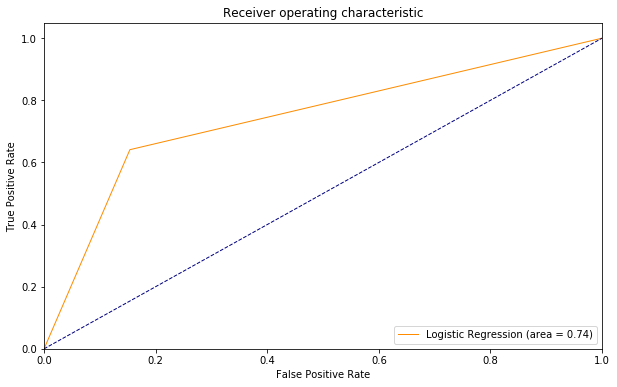

array([0.        , 0.64102564, 1.        ])

In [125]:
fpr, tpr, thresholds = roc_curve(y_predLogReg, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

AUC for logistic regression model is 0.74 and the accuracy is 80.075%

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predLogReg))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1560
          1       0.64      0.54      0.59       553

avg / total       0.79      0.80      0.80      2113



Precision: What proportion of positive identifications was actually correct?
Precision is defined as TP/(TP+FP)

Recall: What proportion of actual positives was identified correctly?
Recall is defined as TP/(TP+FN)
Recall is also called Sensitivity

f1-score: The f1-score gives you the harmonic mean of precision and recall. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.
f1-score = 2*(Recall*Precision)/(Recall+Precision)

However, you can't say conclusively that the above accuracy is the actual accuracy. We are only considering a portion of the data as the test set. To get the mean accuracy, we have to apply cross validation. With k fold cross validation, we divide the data into k chunks and then one of these chunks as test set while keeping the rest as training. We iteratively consider each of these chunks as test set and will calculate the accuracies and its mean. This mean will give you the actual accuracy over the entire dataset.

In [24]:
from sklearn.model_selection import cross_val_score
logRegaccuracies = cross_val_score(estimator=logRegClassifier, X=X_train, y=y_train, cv=10)
logRegaccuracies

array([0.8097166 , 0.80364372, 0.82388664, 0.78340081, 0.81135903,
       0.79716024, 0.79268293, 0.79674797, 0.79878049, 0.84552846])

The above are the individual accuracies for each of the folds. The actual accuracy of the classifier across the entire dataset is given by the mean which is calculated below.

In [25]:
logRegAccuracy = logRegaccuracies.mean()
logRegAccuracy

0.8062906880454601

Naive Bayes Classification:
Naive Bayes is a generative probability classifier. It works using the principle of Bayes Theorem for conditional probability under the assumption that the occurence of one feature has got nothing to do with the occurence of another in a record. This assumption is the reason why it is called Naive.

In [26]:
from sklearn.naive_bayes import GaussianNB
nbClassifier = GaussianNB(priors=None)
nbClassifier.fit(X_train, y_train)
y_predNB = nbClassifier.predict(X_test)

Now the y_predNB vector contains the values predicted by naive bayes classifier. Let's evaluate the model using confusion matrix and roc

In [27]:
nbConfMatrix = confusion_matrix(y_test, y_predNB)
nbConfMatrix

array([[958, 602],
       [ 86, 467]])

Here, accuracy is 67.43 %

Plotting the roc curve and finding the area under roc

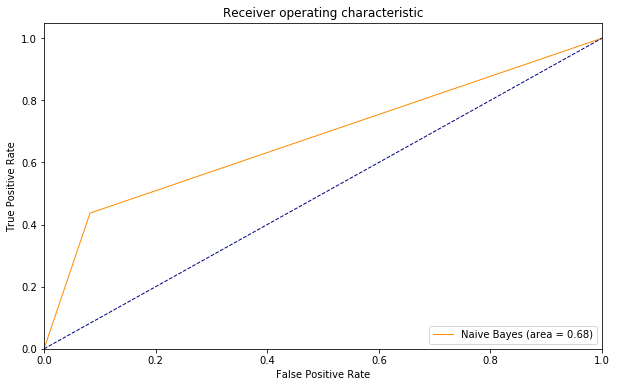

array([0.        , 0.43685688, 1.        ])

In [126]:
fpr, tpr, thresholds = roc_curve(y_predNB, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Naive Bayes (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [29]:
print(classification_report(y_test, y_predNB))

             precision    recall  f1-score   support

          0       0.92      0.61      0.74      1560
          1       0.44      0.84      0.58       553

avg / total       0.79      0.67      0.69      2113



Now let us find the mean accuracy by cross validation.

In [30]:
nbaccuracies = cross_val_score(estimator=nbClassifier, X=X_train, y=y_train, cv=10)
nbaccuracies

array([0.68016194, 0.69230769, 0.71052632, 0.64979757, 0.68356998,
       0.65922921, 0.68495935, 0.65650407, 0.70934959, 0.7195122 ])

The average accuracy after cross validation is:

In [31]:
nbaccuracies.mean()

0.6845917914160212

KNN Classification:
KNN stands for k-nearest neighbor.
KNN is a lazy, non parametric algorithm.
Let us consider 5 neighbors and use euclidian distance (ie minkowski distance with p = 2)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=20, p=2, metric='minkowski')
KNNClassifier.fit(X_train, y_train)
y_predKNN = KNNClassifier.predict(X_test)

Confusion matrix is below.

In [33]:
knnConfMatrix = confusion_matrix(y_test, y_predKNN)
knnConfMatrix

array([[1399,  161],
       [ 286,  267]])

Here, accuracy = 78.845%

Let's plot the roc and find the auc

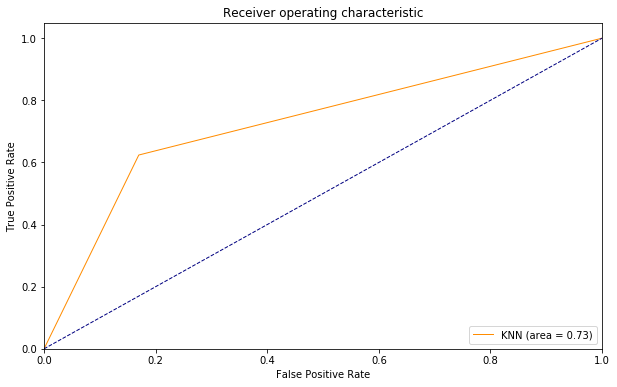

array([0.        , 0.62383178, 1.        ])

In [127]:
fpr, tpr, thresholds = roc_curve(y_predKNN, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [35]:
print(classification_report(y_test, y_predKNN))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1560
          1       0.62      0.48      0.54       553

avg / total       0.78      0.79      0.78      2113



Finding the mean accuracy by doing 10-Fold Cross Validation

In [36]:
knnaccuracies = cross_val_score(estimator=KNNClassifier, X=X_train, y=y_train, cv=10)
knnaccuracies

array([0.79757085, 0.78744939, 0.80769231, 0.78340081, 0.79310345,
       0.75862069, 0.77845528, 0.7804878 , 0.77235772, 0.80894309])

In [37]:
knnaccuracies.mean()

0.7868081400693945

Support Vector Machine Classification:
Unlike other models, SVC does not use the entire dataset to train itself. it uses the tipping points - also know an support vectors. These are those points that define the boundary of the two classes. This is a rare case of dimension reduction with respect to the records as opposed to features.

In [38]:
from sklearn.svm import SVC
svcClassifier = SVC(kernel='linear', random_state=0, cache_size=7000)
svcClassifier.fit(X_train, y_train)
y_predSVM = svcClassifier.predict(X_test)

The predictions made by SVM is stored in y_predSVM, it can be evaluated against the test set.
The confusion matrix is as follows.

In [39]:
svcConfMatrix = confusion_matrix(y_test, y_predSVM)
svcConfMatrix

array([[1400,  160],
       [ 269,  284]])

Plotting the roc and finding the auc

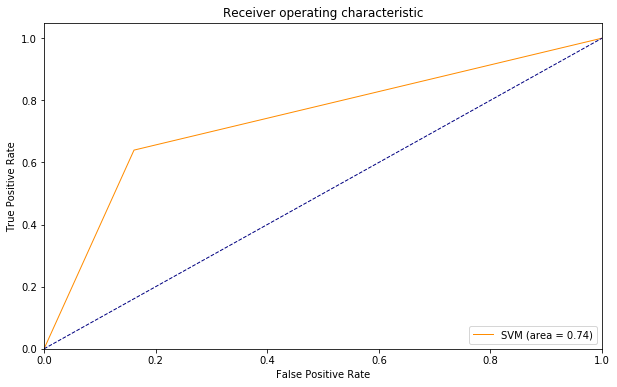

array([0.        , 0.63963964, 1.        ])

In [128]:
fpr, tpr, thresholds = roc_curve(y_predSVM, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [41]:
print(classification_report(y_test, y_predSVM))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1560
          1       0.64      0.51      0.57       553

avg / total       0.79      0.80      0.79      2113



Performing 10-Fold Cross Validation on svcClassifier to find the average accuracy.

In [42]:
svcaccuracies = cross_val_score(estimator=svcClassifier, X=X_train, y=y_train, cv=10)
svcaccuracies

array([0.80364372, 0.77732794, 0.81174089, 0.76315789, 0.80121704,
       0.77079108, 0.78658537, 0.79471545, 0.77845528, 0.83943089])

The average accuracy of Support Vector Machin Classifier is

In [43]:
svcaccuracies.mean()

0.7927065550804312

Although this works, it takes a relatively long time to converge. SVM is computation intensive. Hence, we need to find a way to reduce the number of input dimensions so that the SVM fitting will converge faster.

Principal Component Analysis:
Principal Component Analysis, commonly abbreviated as PCA is a method to reduce the input dimensions without performing feature selection. PCA merely performs a linear transformation of the input data from one form to another. Then generally we only consider the first few resultant principal components as most of the variance of the data will be covered by them. First let us test this on Logistic Regression and then we will apply this to SVM and see if the time taken by the SVM is less.

In [44]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=3, random_state=0)
#pca = PCA(.80)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [45]:
X_train_PCA

array([[-1.49673431, -0.86383322,  1.46482045],
       [-1.81775696,  0.19819546, -1.35792182],
       [-0.83602435,  1.88846571,  2.08460551],
       ...,
       [ 5.9882475 ,  1.30511217,  0.04987963],
       [-1.83061672, -3.7170941 , -1.40426101],
       [ 5.9385955 , -1.46328831, -0.34543381]])

This now only has three columns. This is the result when we take only the first three principal components.

Let us perform logistic regression using the principal components we obtained above.

In [46]:
pcaLogRegClassifier = LogisticRegression(random_state=0)
pcaLogRegClassifier.fit(X_train_PCA, y_train)
y_pred_logReg_PCA = pcaLogRegClassifier.predict(X_test_PCA)

Let's see the confusion matrix of this.

In [47]:
pcaLogRegConfMatrix = confusion_matrix(y_test, y_pred_logReg_PCA)
pcaLogRegConfMatrix

array([[1411,  149],
       [ 305,  248]])

Here, the accuracy is 78.513%

Plotting the roc and finding auc

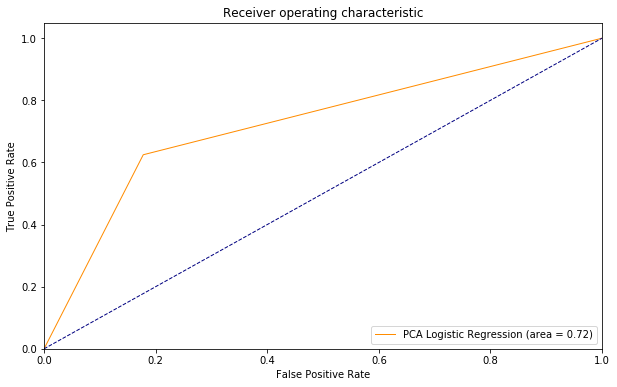

array([0.        , 0.62468514, 1.        ])

In [129]:
fpr, tpr, thresholds = roc_curve(y_pred_logReg_PCA, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='PCA Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [49]:
print(classification_report(y_test, y_pred_logReg_PCA))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1560
          1       0.62      0.45      0.52       553

avg / total       0.77      0.79      0.77      2113



Finding the average accuracy by using 10-fold cross validation

In [50]:
pcaLogRegaccuracies = cross_val_score(estimator=pcaLogRegClassifier, X=X_train_PCA, y=y_train, cv=10)
pcaLogRegaccuracies

array([0.77935223, 0.78340081, 0.80566802, 0.78137652, 0.79918864,
       0.76876268, 0.77845528, 0.78861789, 0.78252033, 0.83333333])

The average accuracy of Logistic Regression on Principal Component Space is

In [51]:
pcaLogRegaccuracies.mean()

0.7900675718576912

Now, let us use these same principal components to fit an SVC model

In [52]:
from sklearn.svm import SVC
svcPCAclassifier = SVC(kernel='linear', random_state=0)
svcPCAclassifier.fit(X_train_PCA, y_train)
y_pred_svc_PCA = svcPCAclassifier.predict(X_test_PCA)

As exected, the SVM took a significantly less time to converge.
Let us see the confusion matrix.

In [53]:
pcaSVCConfMatrix = confusion_matrix(y_test, y_pred_svc_PCA)
pcaSVCConfMatrix

array([[1403,  157],
       [ 291,  262]])

Here, the accuracy is 78.797%

Plotting the roc and finding the auc

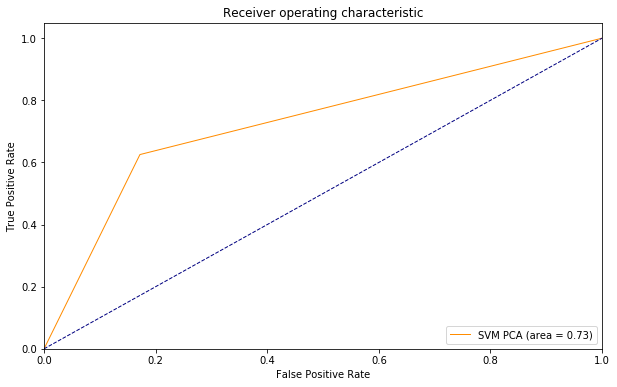

array([0.        , 0.62529833, 1.        ])

In [130]:
fpr, tpr, thresholds = roc_curve(y_pred_svc_PCA, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='SVM PCA (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [55]:
print(classification_report(y_test, y_pred_svc_PCA))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1560
          1       0.63      0.47      0.54       553

avg / total       0.78      0.79      0.78      2113



Applying cross validation on SVC on Principal Component Space.

In [56]:
pcaSVCaccuracies = cross_val_score(estimator=svcPCAclassifier, X=X_train_PCA, y=y_train, cv=10)
pcaSVCaccuracies

array([0.78137652, 0.78137652, 0.81174089, 0.77935223, 0.79107505,
       0.76673428, 0.77642276, 0.79065041, 0.77845528, 0.83739837])

The average SVC accuracy is given by the mean as follows

In [57]:
pcaSVCaccuracies.mean()

0.789458231374325

In [58]:
from sklearn.svm import SVC
kernelSVCclassifier = SVC(kernel="rbf", degree=3, probability=True, random_state=0)
kernelSVCclassifier.fit(X_train, y_train)
y_predKernelSVM = kernelSVCclassifier.predict(X_test)

Let's see the confusion matrix

In [59]:
kernelSVMconfusionMatrix = confusion_matrix(y_test, y_predKernelSVM)
kernelSVMconfusionMatrix

array([[1408,  152],
       [ 275,  278]])

Here, the accuracy is 79.791%

Plotting the roc and finding the auc

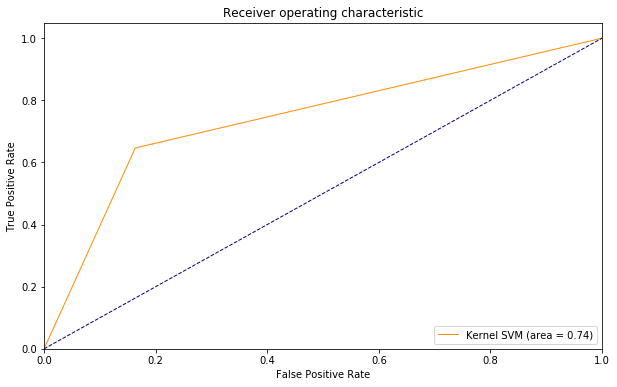

array([0.        , 0.64651163, 1.        ])

In [131]:
fpr, tpr, thresholds = roc_curve(y_predKernelSVM, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Kernel SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [61]:
print(classification_report(y_test, y_predKernelSVM))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1560
          1       0.65      0.50      0.57       553

avg / total       0.79      0.80      0.79      2113



Findind the mean accuracy of the model by applying 10-fold cross validation

In [62]:
kernelSVCaccuracies = cross_val_score(estimator=kernelSVCclassifier, X=X_train, y=y_train, cv=10)
kernelSVCaccuracies

array([0.81174089, 0.79959514, 0.81983806, 0.78340081, 0.81135903,
       0.77890467, 0.78252033, 0.78861789, 0.7804878 , 0.82723577])

The average accuracy of the kernel SVC is 

In [63]:
kernelSVCaccuracies.mean()

0.7983700379086882

Decision Tree Classification:
Decision Tree is the go to method if you want clear insights on how the classifier predicts and under what criteria. This gives clear rules followed by the classifier. Hence, it is not considered as a black box. We are using information gain as the criteria ie criteria = entropy

In [111]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifierEntropy = DecisionTreeClassifier(criterion="entropy", max_features=10, max_depth=4, random_state=0)
decisionTreeClassifierEntropy.fit(X_train, y_train)
y_predDecTreeEntropy = decisionTreeClassifierEntropy.predict(X_test)

Let's see the confusion matrix

In [112]:
decTreeEntropyConfusionMatrix = confusion_matrix(y_test, y_predDecTreeEntropy)
decTreeEntropyConfusionMatrix

array([[1467,   93],
       [ 350,  203]])

Here, the accuracy is 79.03%

Plotting the roc and finding the auc

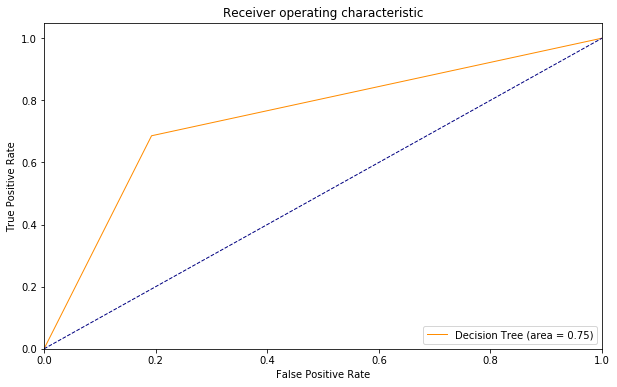

array([0.        , 0.68581081, 1.        ])

In [124]:
fpr, tpr, thresholds = roc_curve(y_predDecTreeEntropy, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [114]:
print(classification_report(y_test, y_predDecTreeEntropy))

             precision    recall  f1-score   support

          0       0.81      0.94      0.87      1560
          1       0.69      0.37      0.48       553

avg / total       0.78      0.79      0.77      2113



It is possible to visualize the generated decision tree but often, it might be too large to be displayed. Also, we need to install pydotplus on our development environment in order for the following snippet to work.

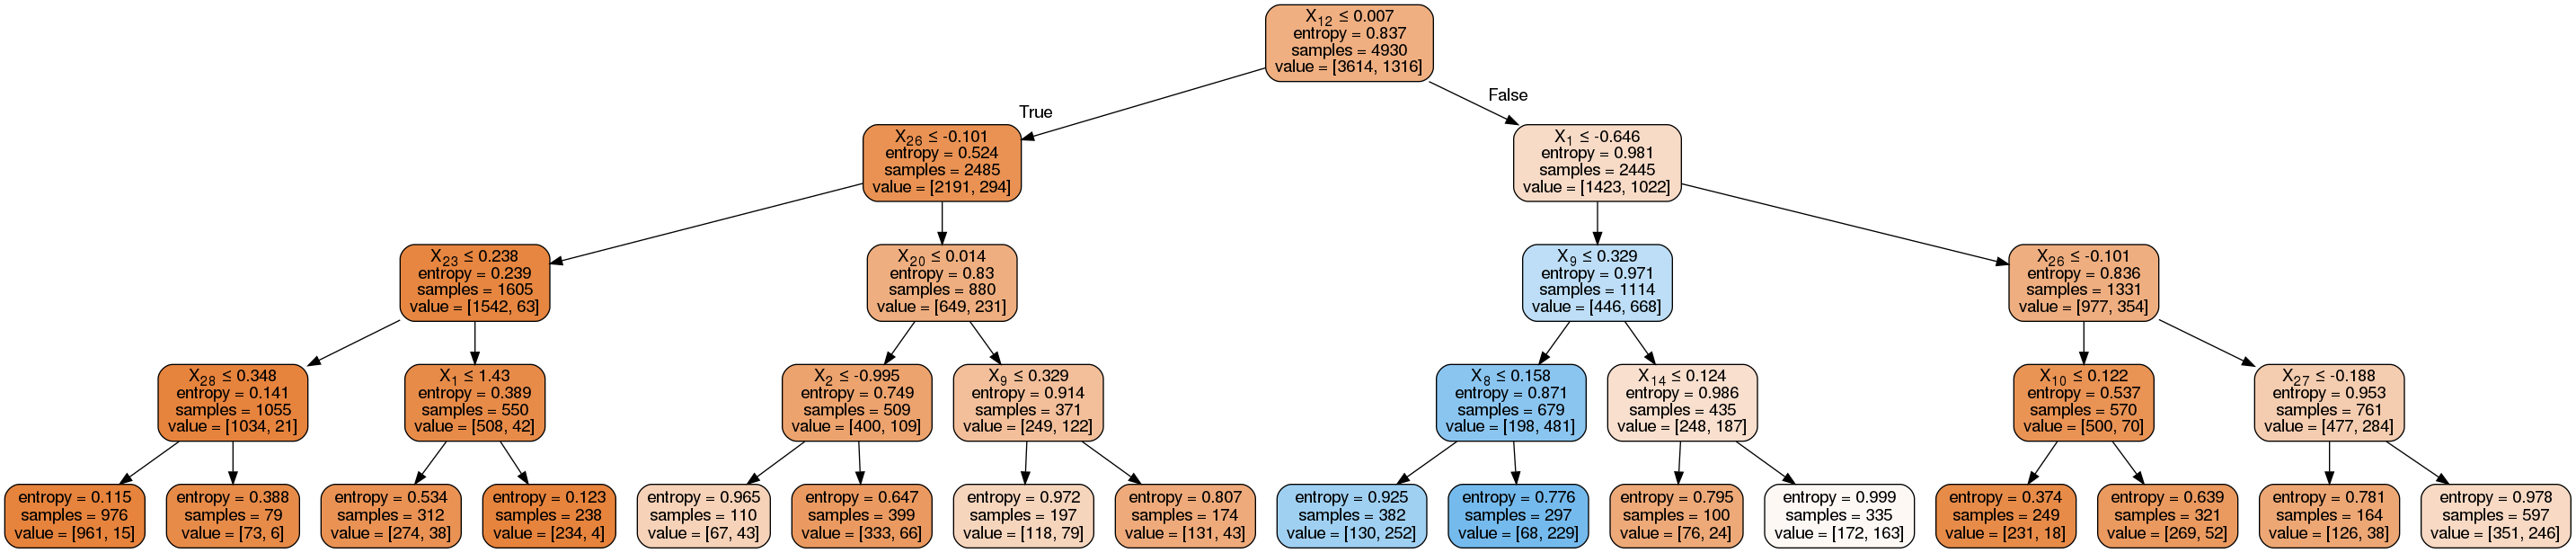

In [115]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dotData = StringIO()
export_graphviz(decisionTreeClassifierEntropy, out_file=dotData, filled=True, rounded=True, special_characters=True)
decTreeEntropyGraph = pydotplus.graph_from_dot_data(dotData.getvalue())
Image(decTreeEntropyGraph.create_png())

Fortunately, in this case, the graph can be viewed. Also, it is worth noting from the above graph that feature selection is implicit in decision tree, furthermore, the hyperparameter max_features can be used to restrict the features.

Finally to conclude, we find the average accuracy by 10 Fold cross validation

In [120]:
decTreeAccuracies = cross_val_score(estimator=decisionTreeClassifierEntropy, X=X_train, y=y_train, cv=10)
decTreeAccuracies

array([0.78947368, 0.78340081, 0.81174089, 0.76923077, 0.79513185,
       0.77484787, 0.76422764, 0.78455285, 0.77845528, 0.82520325])

Finding errors

The mean accuracy of the decision tree classifier is

In [121]:
decTreeAccuracies.mean()

0.7876264894260739

Random Forest Classification:

Random forest comes under a category called ensemble algorithms. Here, instead of one single decision tree, an army of decision trees are used and the results learned by them are then converged together to create the model. The hyperparameter n_estimators can be used to set the number of individual decision trees used in the forest. We are using information gain as criteria as usual.

In [144]:
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier(n_estimators=10, criterion="entropy", max_features=15, max_depth = 4,random_state=0)
randomForestClassifier.fit(X_train, y_train)
y_predRandomForest = randomForestClassifier.predict(X_test)

Confusion matrix for the model is computed below

In [147]:
randomForestConfMatrix = confusion_matrix(y_test, y_predRandomForest)
randomForestConfMatrix

array([[1439,  121],
       [ 312,  241]])

Here, accuracy is 78.75%

Plotting the roc and finding the auc

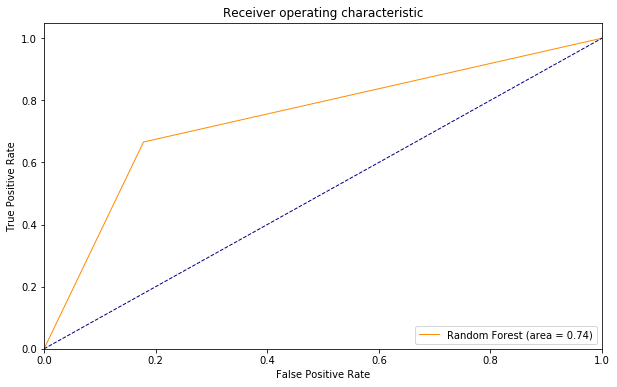

array([0.        , 0.66574586, 1.        ])

In [148]:
fpr, tpr, thresholds = roc_curve(y_predRandomForest, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

As you can see, random forest is giving a much higher auc score compared to decision tree. Ten trees are better than one.

In [74]:
print(classification_report(y_test, y_predRandomForest))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1560
          1       0.63      0.47      0.53       553

avg / total       0.77      0.79      0.78      2113



Finding the mean accuracy of random forest classifier by 10 fold cross validation

In [149]:
randomForestaccuracies = cross_val_score(estimator=randomForestClassifier, X=X_train, y=y_train, cv=10)
randomForestaccuracies

array([0.80566802, 0.78947368, 0.79757085, 0.77530364, 0.81135903,
       0.77890467, 0.77845528, 0.77642276, 0.78252033, 0.83739837])

The mean accuracy is givevn by

In [151]:
randomForestaccuracies.mean()

0.7933076633983033

Light Gradient Boosting Method:
Light GBM is a gradient boosting framework that uses tree based learning algorithm. Light GBM grows tree vertically (leaf wise) while other algorithm grows trees horizontally (level wise). It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

In [77]:
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
lgbmClassifier = LGBMClassifier(learning_rate=0.1, objective="binary", random_state=0, max_depth=12)
lgbmClassifier.fit(X_train, y_train)
y_predLGBM = lgbmClassifier.predict(X_test)

Confusion matrix for lgbm classifier

In [78]:
lgbmConfMatrix = confusion_matrix(y_test, y_predLGBM)
lgbmConfMatrix

array([[1392,  168],
       [ 255,  298]])

Here, the accuracy is 79.981%

Plotting the roc and finding the auc

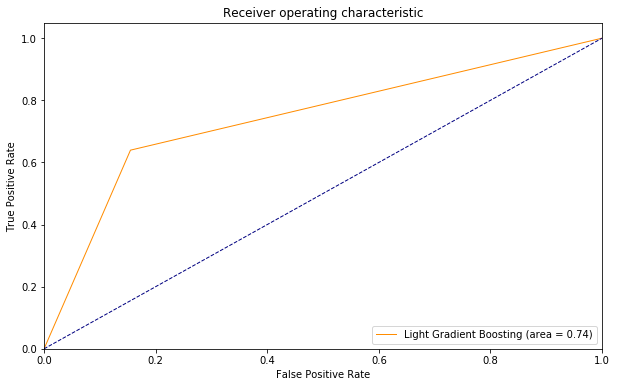

array([0.        , 0.63948498, 1.        ])

In [133]:
fpr, tpr, thresholds = roc_curve(y_predLGBM, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Light Gradient Boosting (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [80]:
print(classification_report(y_test, y_predLGBM))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1560
          1       0.64      0.54      0.58       553

avg / total       0.79      0.80      0.79      2113



Finding the mean accuracy by 10 fold cross validation

In [81]:
lgbmaccuracies = cross_val_score(estimator=lgbmClassifier, X=X_train, y=y_train, cv=10)
lgbmaccuracies

array([0.81174089, 0.79352227, 0.81376518, 0.79352227, 0.80121704,
       0.77281947, 0.77642276, 0.78455285, 0.78861789, 0.81504065])

The mean average achieved from lgbm is

In [82]:
lgbmaccuracies.mean()

0.79512212647851

Xtreme Gradient Boosting:
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [83]:
from xgboost import XGBClassifier
xgbClassifier = XGBClassifier(learning_rate=0.1, max_depth=4)
xgbClassifier.fit(X_train, y_train)
y_predXGB = xgbClassifier.predict(X_test)

Confusion Matrix for xgboost

In [84]:
xgbConfMatrix = confusion_matrix(y_test, y_predXGB)
xgbConfMatrix

array([[1394,  166],
       [ 240,  313]])

Here, accuracy is 79.03%

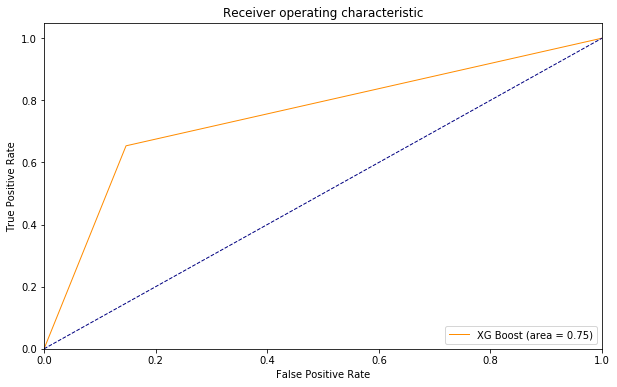

array([0.        , 0.65344468, 1.        ])

In [134]:
fpr, tpr, thresholds = roc_curve(y_predXGB, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='XG Boost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
tpr

In [86]:
print(classification_report(y_test, y_predXGB))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1560
          1       0.65      0.57      0.61       553

avg / total       0.80      0.81      0.80      2113



Applying 10 fold cross validation on the xgbClassifier

In [87]:
xgbAccuracies = cross_val_score(estimator=xgbClassifier, X=X_train, y=y_train, cv=10)
xgbAccuracies

array([0.80769231, 0.80364372, 0.82186235, 0.79959514, 0.82150101,
       0.79107505, 0.78455285, 0.79065041, 0.79471545, 0.83739837])

The average accuracy achieved by the xgboost classifier is

In [88]:
xgbAccuracies.mean()

0.8052686660346661

Multi Layer Perceptron:
A multilayer perceptron is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. MLP can work with non-linearly-separable data.

In [89]:
from sklearn.neural_network import MLPClassifier
nnClassifier = MLPClassifier(activation="relu", solver="sgd", max_iter=85, random_state=0, verbose=False) 
nnClassifier.fit(X_train, y_train)
y_predMLP = nnClassifier.predict(X_test)

Confusion Matrix

In [90]:
mlpConfMatrix = confusion_matrix(y_test, y_predMLP)
mlpConfMatrix

array([[1402,  158],
       [ 266,  287]])

Here, accuracy is 79.933%

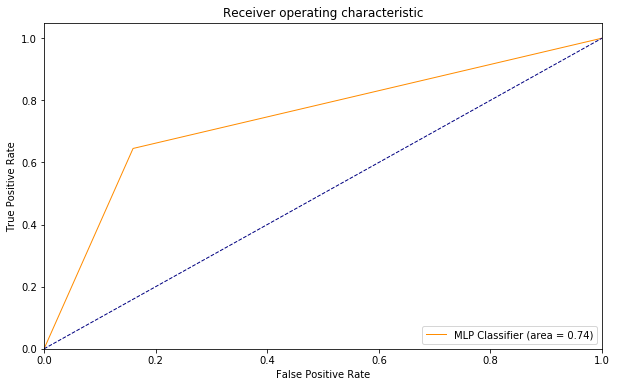

In [91]:
fpr, tpr, thresholds = roc_curve(y_predMLP, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='MLP Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [92]:
print(classification_report(y_test, y_predMLP))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1560
          1       0.64      0.52      0.58       553

avg / total       0.79      0.80      0.79      2113



Finding the average accuracy of MLP classifier by applying 10 fold cross validation

In [93]:
mlpaccuracies = cross_val_score(estimator=nnClassifier, X=X_train, y=y_train, cv=10)
mlpaccuracies

array([0.80769231, 0.80161943, 0.81376518, 0.79149798, 0.79107505,
       0.78701826, 0.79065041, 0.77845528, 0.80894309, 0.83739837])

The average accuracy of MLP classifier is

In [94]:
mlpaccuracies.mean()

0.8008115359545002

Now we are done with all the models. Let us compare the models we generated by plotting the models' roc on the same graph.

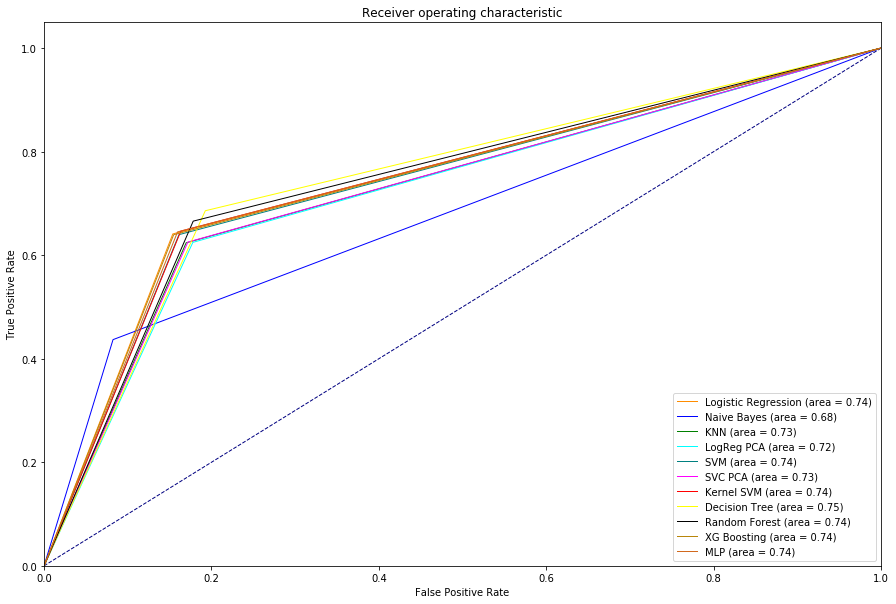

In [153]:
fpr, tpr, thresholds = roc_curve(y_predLogReg, y_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--') # Straight
fpr, tpr, thresholds = roc_curve(y_predNB, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=1, label='Naive Bayes (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predKNN, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=1, label='KNN (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_pred_logReg_PCA, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='cyan', lw=1, label='LogReg PCA (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predSVM, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='teal', lw=1, label='SVM (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_pred_svc_PCA, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='magenta', lw=1, label='SVC PCA (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predKernelSVM, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=1, label='Kernel SVM (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predDecTreeEntropy, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow', lw=1, label='Decision Tree (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predRandomForest, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', lw=1, label='Random Forest (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predLGBM, y_test)
roc_auc = auc(fpr, tpr)
'''
plt.plot(fpr, tpr, color='violet', lw=1, label='Light Gradient Boosting (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predXGB, y_test)
roc_auc = auc(fpr, tpr)
'''
plt.plot(fpr, tpr, color='darkgoldenrod', lw=1, label='XG Boosting (area = %0.2f)' % roc_auc)
fpr, tpr, thresholds = roc_curve(y_predMLP, y_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='chocolate', lw=1, label='MLP (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


We can see that, as expected, xgboost has the highest score. It is closely followed by MLP, LGBM, KernelSVM, SVM and of course Logistic Regression. The worst score is for Decision Tree and Naive Bayes.

Model Selection:

We now have a total of twelve models of varying accuracies. the question now is - "Which model do we select for final deployment so that we can use it to predict the outcome of unseen data. We are using the t statistical test for evaluating the models pairwise with a confidencec level of 5% which is a threshold of 2.82. If the value we get after doing the t test for two models is greater than 2.82, it means that the two models are different

In [96]:
def findT(accuracy1, accuracy2):
    differences = []
    for i in range(10):
        differences.append(abs(accuracy1[i]-accuracy2[i])) #(1-x) - (1-y) = x-y
    meanDiff = mean(differences)
    varDiff = pvariance(differences)
    t = meanDiff/sqrt(varDiff/10)
    if t < 2.82: # 1% confidence level
        return False, t
    return True, t

Comparing logistic regression model with and without principal component analysis

In [97]:
findT(logRegaccuracies, pcaLogRegaccuracies)

(True, 6.257878519827337)

On comparison, we are seeing that for the confidence level of 5%, the two models differ. Since, the accuracy of logistic regression in the input space is higher than that of principal component space, we will choose the default logistic regression over the on PCA.

Comparing logistic regression model with naive bayes model

In [98]:
findT(logRegaccuracies, nbaccuracies)

(True, 25.486975090548732)

There is a huge difference between the predictive power of logistic regression and naive bayes models. We are choosing logistic regression as it has higher accuracy.

Comparing logistic regression with k nearest neighbors

In [99]:
findT(logRegaccuracies, knnaccuracies)

(True, 5.627953755687542)

We are seeing a much lower difference but still a difference nontheless.

Comparing logistic regression with kernel support vector machine model

In [100]:
findT(logRegaccuracies, kernelSVCaccuracies)

(True, 3.66642890842096)

In [102]:
findT(xgbAccuracies, logRegaccuracies)

(True, 4.439529028888354)

In [103]:
findT(xgbAccuracies, mlpaccuracies)

(True, 3.133922240822806)

In [105]:
findT(decTreeAccuracies, randomForestaccuracies)

(True, 8.905517623958163)

In [143]:
findT([0.66,0.73,0.7010309278350515,0.7,0.6808510638297872,0.6428571428571429,0.7471264367816092,0.6076923076923076,0.723404255319149,0.76], [0.6178343949044586, 0.7114093959731543, 0.65625, 0.6604938271604939, 0.6225165562913907, 0.643312101910828, 0.684931506849315, 0.6975308641975309, 0.65, 0.68])

(True, 6.137814886884081)